<a href="https://colab.research.google.com/github/Rachit304/Machine-Leaning/blob/main/ML_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

from sklearn import preprocessing

In [ ]:
mc = pd.read_csv('Movie_classification.csv')
mc.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [ ]:
df = mc[['Genre','Budget','Collection']]
df.head()

,Genre,Budget,Collection
0,Thriller,36524.125,48000
1,Drama,35668.655,43200
2,Comedy,39912.675,69400
3,Drama,38873.890,66800
4,Drama,39701.585,72400


In [ ]:
df.isnull().sum()

Genre         0
Budget        0
Collection    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


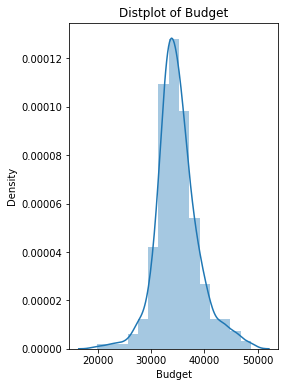

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


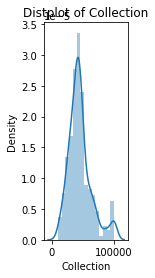

In [ ]:
plt.figure(1,figsize = (15,6))
graph = 0

for x in ['Budget','Collection']:
  graph +=1

  plt.subplot(1,3,graph)
  plt.subplots_adjust(hspace  = 0.5, wspace = 0.5)
  sns.distplot(df[x],bins = 15)
  plt.title('Distplot of {}'.format(x))

  plt.show()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Genre']=label_encoder.fit_transform(df['Genre'])
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Genre,Budget,Collection
0,3,36524.125,48000
1,2,35668.655,43200
2,1,39912.675,69400
3,2,38873.890,66800
4,2,39701.585,72400


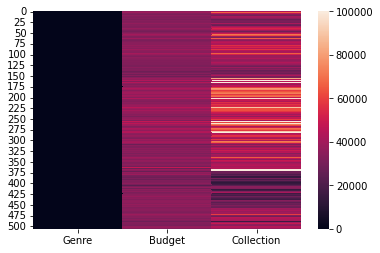

In [ ]:

sns.heatmap(df)
plt.show()

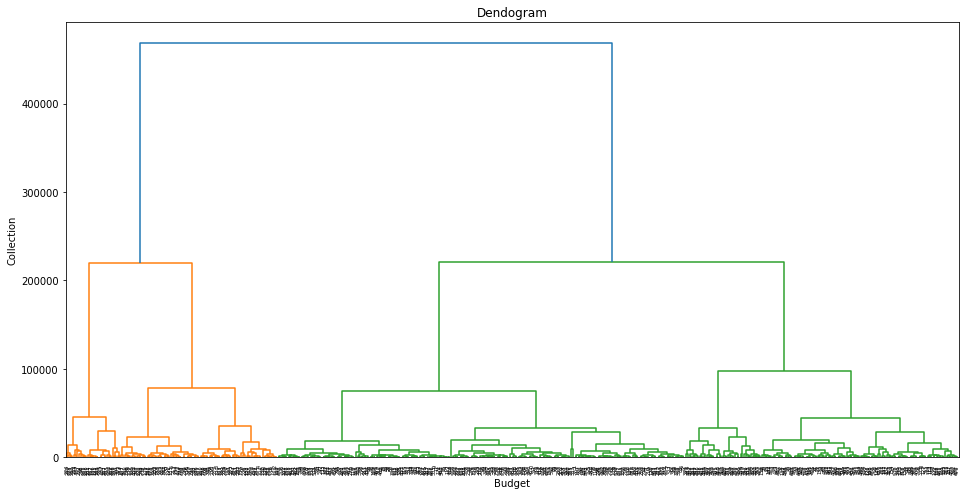

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(1,figsize =(16,8))

dendrogram = sch.dendrogram(sch.linkage(df,method = "ward"))

plt.title('Dendogram')
plt.xlabel('Budget')
plt.ylabel('Collection')
plt.show()

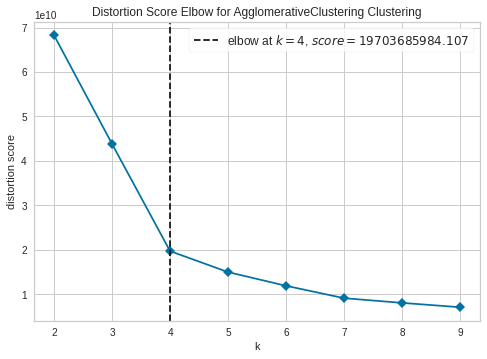

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
# Fit data to visualizer
visualizer.fit(df)
# Finalize and render figure
visualizer.show()